In [257]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [258]:
my_data_dir = 'E:\\MS_CODER\\Dataset\\'

In [259]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['non_eye', 'test', 'train']

In [260]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [261]:
os.listdir(test_path)

['Red Eye', 'White Eye']

In [262]:
os.listdir(train_path)

['Red Eye', 'White Eye']

In [263]:
os.listdir(train_path+'\\Red Eye')[0]

'1.jpg'

In [264]:
Red_Eye = train_path+'\\Red Eye'+'\\27.jpg'

In [265]:
red_img= imread(Red_Eye)

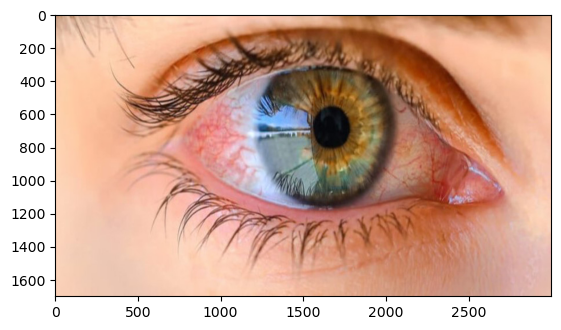

In [266]:
plt.imshow(red_img)

In [267]:
red_img.shape

(1700, 3000, 3)

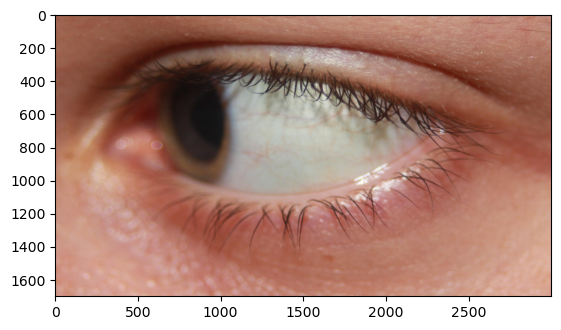

In [268]:
white_eye_path = train_path+'\\White Eye\\'+os.listdir(train_path+'\\White Eye')[0]
white_eye = imread(white_eye_path)
plt.imshow(white_eye)

In [269]:

len(os.listdir(train_path+'\\White Eye'))

100

In [270]:
len(os.listdir(train_path+'\\Red Eye'))

100

Let's find out the average dimensions of these images.

In [271]:
white_eye.shape

(1700, 3000, 3)

In [272]:
red_img.shape

(1700, 3000, 3)

In [273]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\White Eye'):
    
    img = imread(test_path+'\\White Eye'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [274]:
np.mean(dim1)

1372.35

In [275]:
np.mean(dim2)

2250.05

In [276]:
image_shape = (150, 150, 3)  # or even (224, 224, 3)

In [277]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [278]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

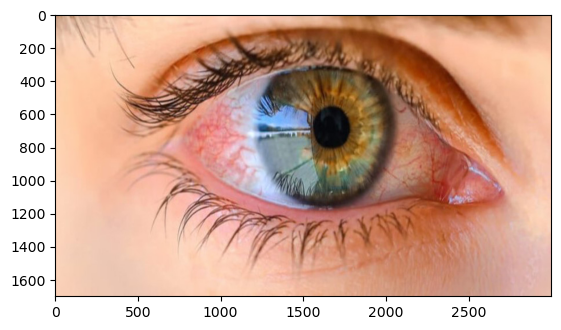

In [279]:
plt.imshow(red_img)

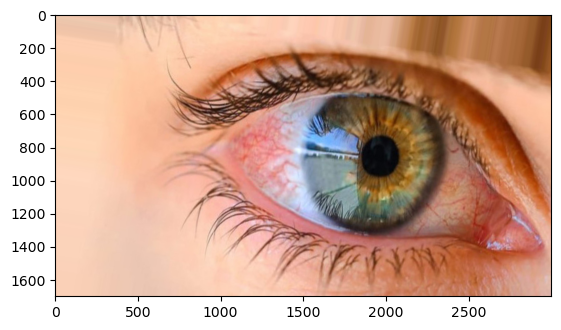

In [280]:

plt.imshow(image_gen.random_transform(red_img))

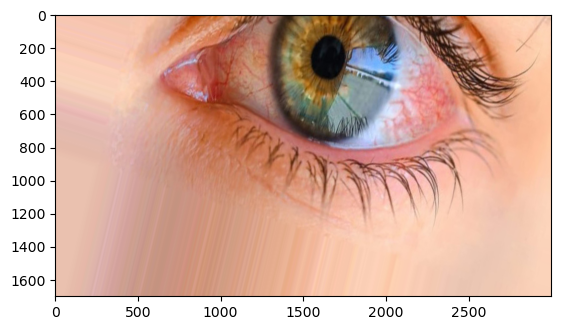

In [281]:
plt.imshow(image_gen.random_transform(red_img))

In [282]:
image_gen.flow_from_directory(train_path)

Found 200 images belonging to 2 classes.


In [283]:
image_gen.flow_from_directory(test_path)

Found 40 images belonging to 2 classes.


Creating the Model

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [285]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [286]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping

In [287]:
from tensorflow.keras.callbacks import EarlyStopping

In [288]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

Training the Model

In [289]:
batch_size = 20

In [290]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 200 images belonging to 2 classes.


In [291]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 40 images belonging to 2 classes.


In [292]:

train_image_gen.class_indices

{'Red Eye': 0, 'White Eye': 1}

In [293]:
import warnings
warnings.filterwarnings('ignore')

In [294]:
history = model.fit(train_image_gen, epochs=5, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.4737 - loss: 0.8362 - val_accuracy: 0.5000 - val_loss: 0.6741
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5995 - loss: 0.6625 - val_accuracy: 0.6750 - val_loss: 0.6124
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6460 - loss: 0.6180 - val_accuracy: 0.7250 - val_loss: 0.5190
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7685 - loss: 0.4509 - val_accuracy: 0.8250 - val_loss: 0.3986
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8673 - loss: 0.3356 - val_accuracy: 0.8250 - val_loss: 0.3651


In [295]:
from tensorflow.keras.models import load_model
model.save('E:/MS_CODER/my_models/SH_model3.h5')

In [296]:
# model_path = "con_i.h5"
# model = load_model(model_path)

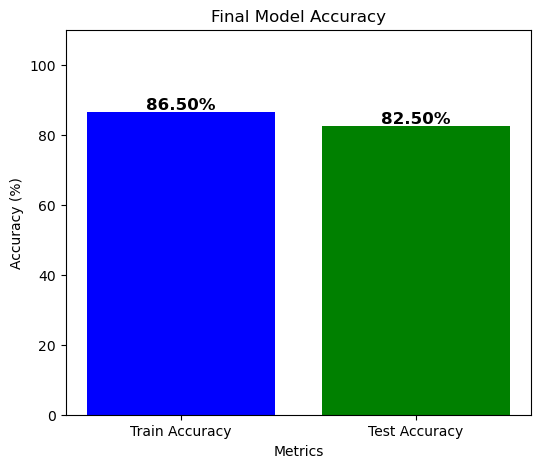

In [297]:
import matplotlib.pyplot as plt

# Last epoch ki accuracy values lena
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]  # Val accuracy ko test accuracy maana

# Bar graph ke liye data
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_acc * 100, test_acc * 100]  # Percentage me convert kiya

# Bar chart plot karna
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Upar % values show karna
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Metrics")
plt.ylabel("Accuracy (%)")
plt.title("Final Model Accuracy")
plt.ylim(0, 110)  # 100% se thoda upar tak rakha
plt.show()

In [298]:
losses = pd.DataFrame(model.history.history)

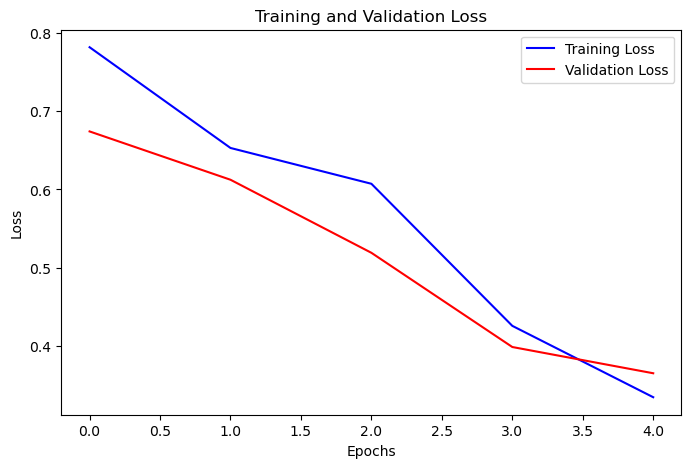

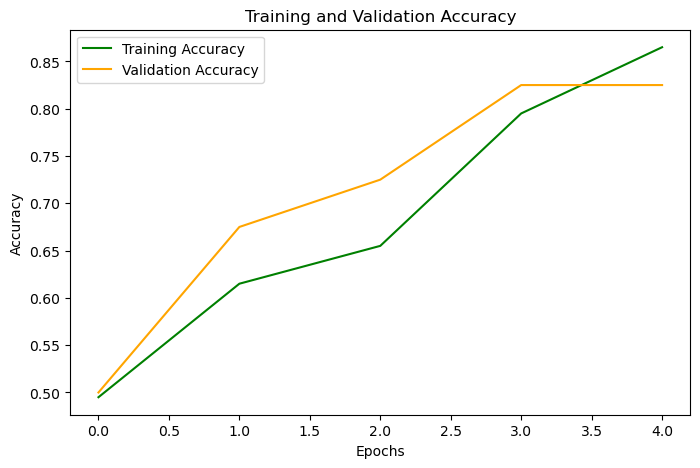

In [299]:
import matplotlib.pyplot as plt

# Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Training vs Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [300]:
# losses[['loss','val_loss']].plot()

In [301]:
model.metrics_names

['loss', 'compile_metrics']

In [302]:
model.evaluate(test_image_gen)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8833 - loss: 0.2914


[0.36743322014808655, 0.8500000238418579]

In [303]:
from tensorflow.keras.preprocessing import image

In [304]:
pred_probabilities = model.predict(test_image_gen)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


In [305]:

pred_probabilities

array([[4.9045984e-02],
       [1.5893923e-02],
       [5.9019489e-04],
       [3.0178655e-04],
       [1.0404545e-02],
       [3.9361659e-02],
       [1.0016393e-02],
       [7.8783385e-02],
       [1.8649828e-01],
       [1.3713840e-02],
       [6.9055194e-04],
       [8.4505714e-03],
       [2.8461777e-03],
       [3.9599766e-03],
       [3.7322868e-02],
       [6.8760610e-01],
       [1.7778254e-01],
       [2.7206221e-03],
       [5.6344182e-03],
       [5.4024655e-02],
       [3.5774535e-01],
       [9.6523649e-01],
       [9.7743386e-01],
       [9.4140244e-01],
       [9.1555369e-01],
       [9.1751665e-01],
       [9.1411310e-01],
       [5.2923417e-01],
       [7.7790034e-01],
       [6.8916476e-01],
       [1.0945005e-01],
       [1.8041687e-01],
       [7.8108776e-01],
       [4.4434652e-01],
       [1.3157253e-01],
       [7.9350549e-01],
       [3.0651054e-01],
       [8.9875311e-01],
       [9.4695210e-01],
       [9.3053532e-01]], dtype=float32)

In [306]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [307]:
predictions = pred_probabilities > 0.5

In [308]:
# # Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [309]:
from sklearn.metrics import classification_report,confusion_matrix

In [310]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.93      0.70      0.80        20

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40



In [311]:
confusion_matrix(test_image_gen.classes,predictions)

array([[19,  1],
       [ 6, 14]], dtype=int64)

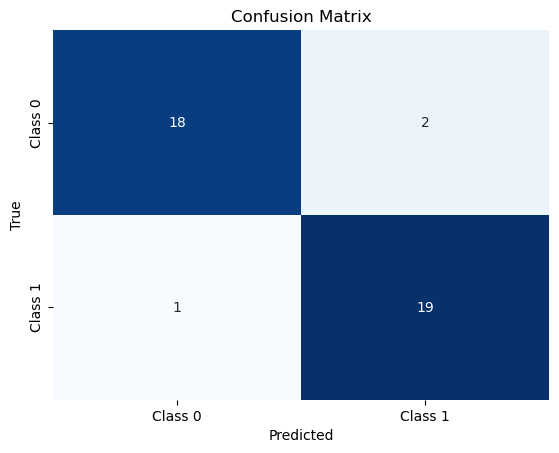

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example confusion matrix
conf_matrix = [[18, 2],
               [1, 19]]

# Generate the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

Predicting on Images

In [312]:
sample='E:\\MS_CODER\\Dataset\\train\\White Eye\\14R_r_1.jpg'

In [313]:
my_image = image.load_img(sample,target_size=image_shape)

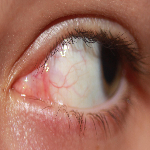

In [314]:
my_image

In [315]:
type(my_image)

PIL.Image.Image

In [316]:
my_image = image.img_to_array(my_image)

In [317]:

type(my_image)

numpy.ndarray

In [318]:
my_image.shape

(150, 150, 3)

In [319]:
my_image = np.expand_dims(my_image, axis=0)

In [320]:
result=print(model.predict(my_image)) # 1 means White Eye and O means Red Eye
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
[[1.]]


In [321]:
train_image_gen.class_indices

{'Red Eye': 0, 'White Eye': 1}

In [322]:
test_image_gen.class_indices

{'Red Eye': 0, 'White Eye': 1}